# bunching estimation using the real data

take concept from simulation

In [18]:
# load packages

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
import numpy as np
#from scipy.optimize import fsolve
#from scipy import integrate
from sympy import symbols, solve, Eq
import random
from heapq import nlargest
import tools # this imports the file tools.py // must be in the same folder as the current file
import zipfile

np.random.seed(111)


In [19]:
# load data
wd = Path.cwd()
folder = 'stata'
file = 'Outages_{period}.dta'
zip = 'Outages_{period}.zip'
zip = zipfile.ZipFile(wd.parent/folder/zip)
data = pd.read_stata(zip.open(file)) # convert_categoricals = True
#print(data.columns)


data['year'] = data.apply(lambda row: row.date.year, axis=1)

# keep year 2019
#data = data[data.apply(lambda row: row.date.year == 2019, axis=1)]

# keep only unplanned
data = data.loc[data.planned != 'planned',]

# at least 100 custumers affected
data = data.loc[data.noofcustomersaffected >= 100]

data.reset_index(drop = True)

# there is probably some rounding issue in unserveredmuduetooutage
# if it is 0 we replace it with 0.00001
data.loc[data.unservedmuduetooutage.isna() ,'unservedmuduetooutage'] = 0.00001


# keep one firm
#data = data.loc[data.discom == 'tata',]
#data.describe()

density of duration 

(0.0, 420.0)

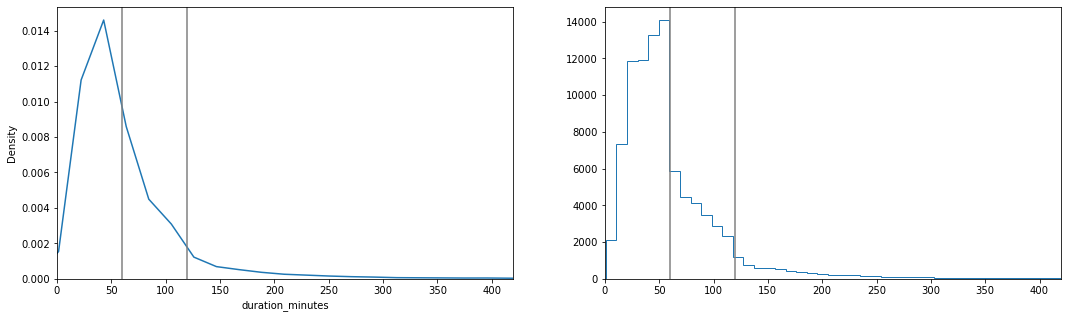

In [21]:
xmax  = 420

fig, axs = plt.subplots(1,2,figsize=(18,5))
sns.kdeplot(data.duration_minutes, ax = axs[0])
axs[0].axvline(60, color  = 'grey')
axs[0].axvline(120, color  = 'grey')
axs[0].set_xlim(0,xmax)

axs[1].hist(data.duration_minutes, histtype = 'step', bins = xmax)
axs[1].axvline(60, color  = 'grey')
axs[1].axvline(120, color  = 'grey')
axs[1].set_xlim(0,xmax)

# Bunching Estimation

In [22]:
# bunching at x = 60
bsize = 1
ex_reg = 10
ex_reg_miss = 20
z = 59
z_lower60 = z - bsize*ex_reg

missing60 = z + ex_reg_miss*bsize

bunch60 = tools.bunching(data.duration_minutes, bsize = bsize, xmax= 115, xmin= 0, z_upper= z, z_lower= z_lower60, missing = missing60, ex_reg= ex_reg, ex_reg_miss=ex_reg_miss, poly_dgr=6)
#print(bunch60.df_count())

display(bunch60.estimation_res())

print('EX:', bunch60.get_deltaX(), 'mX:', bunch60.get_mX(), 'B:', bunch60.get_B())

pred60 = bunch60.prediction()

print('total bunching',bunch60.total_bunch())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   nobs   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     452.3
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           3.04e-78
Time:                        12:07:31   Log-Likelihood:                -663.63
No. Observations:                 115   AIC:                             1345.
Df Residuals:                     106   BIC:                             1370.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.5412     49.055      0.561      0.576     -69.715     124.797
duration      10.8439     13.052      0.831      0.408     -15.033      36.721
duration2      4.5289      1.071      4.229      0.000       2.406       6.652
duration3     -0.1817      0.037     -4.956      0.000      -0.254      -0.109
duration4      0.0027      0.001      4.591      0.000       0.002       0.004
duration5    -1.8e-05   4.44e-06     -4.052      0.000   -2.68e-05   -9.19e-06
duration6   4.517e-08   1.27e-08      3.549      0.001    1.99e-08    7.04e-08
b            341.7721     42.059      8.126      0.000     258.385     425.159
m           -139.8720     39.564     -3.535      0.001    -218.311     -61.433
==============================================================================
Omnibus:                        8.850   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               12.160
Skew:                           0.384   Prob(JB):                      0.00229
Kurtosis:                       4.395   Cond. No.                     4.74e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

EX: 3.4518663643897822 mX: -4.158703352542784 B: 3604.582851710693
total bunching 4.303755439887405


In [23]:
# bunching at x = 120
bsize = 1
ex_reg = 10
z = 119
z_lower120 = z - 5 * bsize
missing120 = z + ex_reg * bsize

# define bins

bunch120 = tools.bunching(data.duration_minutes, bsize = bsize, xmax= 160, xmin= 90, z_upper= z, z_lower= z_lower120, missing = missing120, ex_reg= ex_reg, ex_reg_miss = ex_reg_miss, poly_dgr=9, include_missing=False)
#print(bunch120.df_count())

display(bunch120.estimation_res())

print('deltaX:', bunch120.get_deltaX())

pred120 = bunch120.prediction()

print('total bunching',bunch120.total_bunch())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   nobs   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     265.6
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           2.14e-41
Time:                        12:07:33   Log-Likelihood:                -322.63
No. Observations:                  70   AIC:                             657.3
Df Residuals:                      64   BIC:                             670.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.615e-11   1.07e-11      1.511      0.136    -5.2e-12    3.75e-11
duration   -2.181e-08   1.44e-08     -1.511      0.136   -5.06e-08    7.02e-09
duration2   5.101e-08   3.37e-08      1.512      0.136   -1.64e-08    1.18e-07
duration3   2.073e-06   1.37e-06      1.512      0.136   -6.67e-07    4.81e-06
duration4   5.118e-05   3.38e-05      1.512      0.135   -1.64e-05       0.000
duration5  -5.851e-07   1.07e-06     -0.545      0.587   -2.73e-06    1.56e-06
duration6  -2.306e-09   1.26e-08     -0.183      0.856   -2.75e-08    2.29e-08
duration7   4.831e-11   6.54e-11      0.739      0.463   -8.23e-11    1.79e-10
duration8  -1.471e-13   1.26e-13     -1.168      0.247   -3.99e-13    1.04e-13
duration9  -5.858e-19    7.1e-19     -0.825      0.412      -2e-18    8.32e-19
b          -3.343e-11   2.21e-11     -1.511      0.136   -7.76e-11    1.08e-11
==============================================================================
Omnibus:                        2.605   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.195
Skew:                           0.023   Prob(JB):                        0.334
Kurtosis:                       3.866   Cond. No.                     1.12e+25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.23e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

deltaX: 2.4345764836681165
total bunching 1.0355002865033742


plot of counterfactual and actual data

Text(0.5, 0, 'Duration (Minutes)')

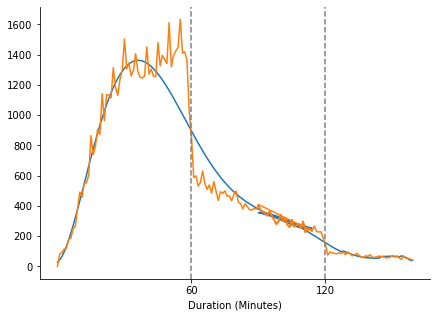

In [24]:
# concat the two predictions
pred = pd.concat([pred60,pred120], ignore_index=True)
#xs = tools.bunching(data.duration_minutes, bsize = bsize, xmax= xmax, xmin= 0, z_upper= z, z_lower= z_lower120, missing = missing120, ex_reg= ex_reg, ex_reg_miss = ex_reg_miss, poly_dgr=6, include_missing=False).df_count()


fig, ax = plt.subplots(figsize=(7,5))
plt.plot(pred.duration, pred.y_pred)
plt.plot(pred.duration, pred.nobs)
plt.axvline(60, color= 'grey', linestyle = 'dashed')
plt.axvline(120, color= 'grey', linestyle = 'dashed')
plt.xticks(ticks = [60, 120])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Duration (Minutes)')

Visualize $\Delta x$

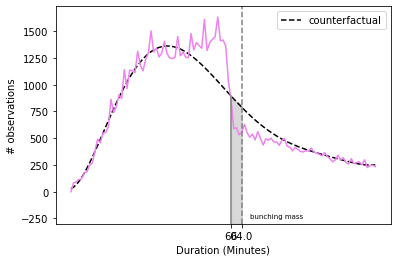

In [25]:
fig, ax = plt.subplots()
b = np.round(60 + bunch60.total_bunch())
min = -300
plt.plot(pred60.duration[pred60.duration >= 0], pred60.y_pred[pred60.duration >= 0], color = 'black', linestyle='dashed', label = 'counterfactual')
plt.plot(pred60.duration, pred60.nobs, color = 'violet')
plt.plot([60,60], [min,pred60.loc[pred60.duration == 60, 'y_pred'].reset_index(drop=True)[0]], color = 'grey')
plt.axvline(b,color='grey', linestyle = 'dashed')
plt.xlabel('Duration (Minutes)')
plt.ylabel('# observations')
plt.xticks([60 , b], labels = [60,b])
plt.ylim(min,pred60.nobs.max()+ 100)
plt.fill_between(np.linspace(60,b,np.sum((pred60.duration > 60) & (pred60.duration < b))),pred60.y_pred[(pred60.duration > 60) & (pred60.duration < b)], np.repeat(min,np.sum((pred60.duration > 60) & (pred60.duration < b))), alpha = .3, color = 'grey')
plt.annotate('bunching mass', xy = (67,min + 50), size = 7)
plt.legend()

#fig.savefig('xdensity.png',dpi=120, format='png')

## get counterfactual duration at outage level

!! this is maybe not optimal. Right now, I am assuming a poisson distribution in the bins of the missing mass. \


In [26]:
# first need to get the counterfactuals on the outage-level
cf = pd.concat([pred60,pred120], ignore_index=True)
cf = cf.loc[:,['bin', 'nobs', 'duration', 'b', 'm','y_pred']]

cf['difference'] = cf.nobs - cf.y_pred
# make sure that at least one bin is in missing
upper60 = 60 + bunch60.total_bunch() + bsize 
upper120 = 120 + bunch120.total_bunch() + bsize 
# create dummies
cf['b60'] = cf.apply(lambda row: 1 if (row.b ==1) & (row.duration <= missing60) else 0, axis = 1)
cf['missing60'] = cf.apply(lambda row: 1 if (row.duration > 60) & (row.duration <= upper60) else 0, axis = 1)
cf['b120'] = cf.apply(lambda row: 1 if (row.b ==1) & (row.duration >= z_lower120) else 0, axis = 1)
cf['missing120'] = cf.apply(lambda row: 1 if (row.duration > 120) & (row.duration <= upper120) else 0, axis = 1)

# calculate missing
sum60 = cf.loc[(cf.duration > 60) & (cf.duration <= upper60),'y_pred'].sum()
sum120 = cf.loc[(cf.duration > 120) & (cf.duration <= upper120),'y_pred'].sum()

# calculate probability of being in bin
cf['prob'] = 0
cf.loc[(cf.duration > 60) & (cf.duration <= upper60), 'prob'] = cf.y_pred / sum60
cf.loc[(cf.duration > 120) & (cf.duration <= upper120), 'prob'] = cf.y_pred / sum120

print(cf.prob.sum() == 2)
cf[(cf.b60 == 1) | (cf.b120 == 1) | (cf.missing120 == 1) | (cf.missing60 == 1)]

True


,bin,nobs,duration,b,m,y_pred,difference,b60,missing60,b120,missing120,prob
49,"(49, 50)",1342,49,1,0,1187.089789,154.910211,1,0,0,0,0.000000
50,"(50, 51)",1611,50,1,0,1162.914732,448.085268,1,0,0,0,0.000000
51,"(51, 52)",1320,51,1,0,1137.887752,182.112248,1,0,0,0,0.000000
52,"(52, 53)",1395,52,1,0,1112.140042,282.859958,1,0,0,0,0.000000
53,"(53, 54)",1425,53,1,0,1085.799842,339.200158,1,0,0,0,0.000000
54,"(54, 55)",1448,54,1,0,1058.991946,389.008054,1,0,0,0,0.000000
55,"(55, 56)",1633,55,1,0,1031.837257,601.162743,1,0,0,0,0.000000
56,"(56, 57)",1410,56,1,0,1004.452360,405.547640,1,0,0,0,0.000000
57,"(57, 58)",1418,57,1,0,976.949140,441.050860,1,0,0,0,0.000000
58,"(58, 59)",1361,58,1,0,949.434423,411.565577,1,0,0,0,0.000000


In [27]:

## difference in b60 need to be distributed to missing mass
## can we improve this? It is okay but not optimal

data['duration_cf'] = data.duration_minutes

dict = {'60': cf.loc[(cf.b60 ==1) & (cf.difference >0),].index, '120': cf.loc[(cf.b120 ==1) & (cf.difference >0),].index}
dict_m = {'60': cf.missing60, '120':cf.missing120}

for d in ['60','120']:
    ind = dict[d]
    m = dict_m[d]
    for b in ind:
        # select bin
        bin = cf.bin[b]   
        # get 'extra' observations
        diff = np.round(cf.difference[b]).astype(int)
        #print(bin, diff)
        # extract the data in bin and select n = diff random values
        new_data = data.loc[(data.duration_cf >= bin[0]) & (data.duration_cf <= bin[1])].sample(n = diff, axis = 0)
        # now randomly choose a bin in the missing mass, weighted by prob of observations being in that bin bin
        mis = cf.loc[m == 1,].sample(n=1, axis =0, weights = cf.prob).bin.reset_index(drop=True)[0]
        # create n=diff random values in bin
        new = np.random.poisson((mis[1] +  mis[0])/2, size = diff) # here I am assuming a poisson distribution in the bins
        # replace values in new_data
        data.loc[new_data.index.tolist(),'duration_cf'] = new

#data.describe()

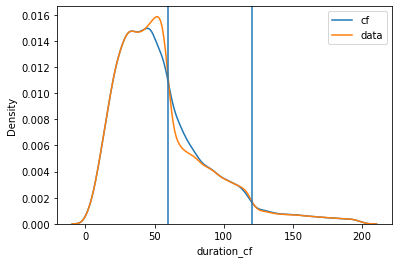

In [28]:
# should look similar to counterfactual density from bunching estimation
sns.kdeplot(data.duration_cf[data.duration_cf < 200], label = 'cf')
sns.kdeplot(data.duration_minutes[data.duration_minutes < 200], label='data')
#plt.xlim(55,65)
#plt.ylim(0.000,0.004)
plt.legend()

plt.axvline(60)
plt.axvline(120)

In [29]:
# export 
data.to_csv(wd.parent/'data'/'data_transformed'/'outage_bunch.csv', index=False)